In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates



In [2]:
archivo_csv_test = 'adolescent#001.csv'
datos_test = pd.read_csv(archivo_csv_test)


BG = datos_test['BG']
Hour = datos_test['Time']

In [3]:
def sacar_hora(hh):
    # Convertir la cadena a un objeto datetime
    fecha_hora = datetime.strptime(hh, '%Y-%m-%d %H:%M:%S')
    return fecha_hora

In [4]:
y = [mdates.date2num(sacar_hora(n)) for n in Hour]


In [5]:
df = pd.DataFrame({'Hour': y, 'Glucose': BG})


clf = IsolationForest(contamination = 0.03)  # Puedes ajustar el parámetro de contaminación según tus necesidades
clf.fit(df)

IsolationForest(contamination=0.03)

In [6]:
predictions = clf.predict(df)

count = 0
for a in predictions:
    if a == -1:
        count +=1

print('The user has received',count,'notifications of measurements outside the usual range.')

The user has received 72 notifications of measurements outside the usual range.


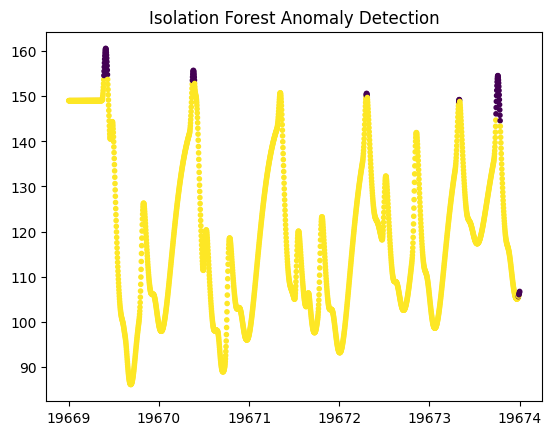

In [7]:
plt.scatter(y, BG, c=predictions, cmap='viridis',marker='.')
plt.title('Isolation Forest Anomaly Detection')

plt.show()